## **机器学习-SVM作业**

本案例未完全覆盖 SVM 的全部操作，欢迎你将更全面的 SVM 学习笔记分享到[ AI Gallery Notebook](https://marketplace.huaweicloud.com/markets/aihub/notebook/list/) 版块获得[成长值](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=9b8d7e7a-a150-449e-ac17-2dcf76d8b492)，分享方法请查看[此文档](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=8afec58a-b797-4bf9-acca-76ed512a3acb)。

### **题目描述**

请你尝试修改 SVC() 函数的 C（惩罚系数） 参数的不同取值，看看该参数的修改对模型会有怎样的影响

提示：

1. 你可以在cell中执行代码"help(函数名)"来查看函数的使用方法；
2. <font color='red'>请在下文中搜索英文问号?，问号所在之处就是你需要修改代码的地方</font>；
3. 修改好代码之后，跑通整个案例代码，即可完成作业，请将完成的作业分享到AI Gallery，<font color='red'>标题以“2021实战营”为开头命名</font>；

### **代码实现**
请在下面 cell 中编写代码，实现题目描述的要求。

### 1、导入相关的方法

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import moxing as mox
from sklearn import svm
%matplotlib inline

INFO:root:Using MoXing-v1.17.3-
INFO:root:Using OBS-Python-SDK-3.20.7


### 2、对文件进行逐行解析，从而得到第行的类标签和整个数据矩阵

In [2]:
def loadDataSet(fileName):
    """
    Args:
        fileName 文件名
    Returns:
        dataMat  数据矩阵
        labelMat 类标签
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat


if not os.path.exists('testSet.txt'):
    mox.file.copy('obs://modelarts-labs-bj4-v2/course/hwc_edu/machine_learning/datasets/SVM/testSet.txt', 'testSet.txt')
X, Y = loadDataSet('./testSet.txt')
X = np.mat(X)

### 3、可视化数据集

In [3]:
print("X=", X[:5])
print("Y=", Y[:5])

X= [[ 3.542485e+00  1.977398e+00]
 [ 3.018896e+00  2.556416e+00]
 [ 7.551510e+00 -1.580030e+00]
 [ 2.114999e+00 -4.466000e-03]
 [ 8.127113e+00  1.274372e+00]]
Y= [-1.0, -1.0, 1.0, -1.0, 1.0]


拟合一个SVM模型

C越大 惩罚越大，越容易过拟合
grid search

### 4、训练模型

In [20]:
clf1 = svm.SVC(C=0.0001, kernel='linear', gamma=10)  # 请在此处修改 C 的参数值
clf2 = svm.SVC(C=1, kernel='linear', gamma=10)
clf3 = svm.SVC(C=10, kernel='linear', gamma=10)

clf1.fit(X, Y)
clf2.fit(X, Y)
clf3.fit(X, Y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# 获取分割超平面
w = clf1.coef_[0]
# 斜率
a = -w[0] / w[1]
# 从-2到10，顺序间隔采样50个样本，默认是num=50
xx = np.linspace(-2, 10)  # , num=50)
# 二维的直线方程
yy = a * xx - (clf1.intercept_[0]) / w[1]
print("yy=", yy)

yy= [-956.96403887 -951.41125853 -945.85847819 -940.30569784 -934.7529175
 -929.20013715 -923.64735681 -918.09457647 -912.54179612 -906.98901578
 -901.43623543 -895.88345509 -890.33067475 -884.7778944  -879.22511406
 -873.67233371 -868.11955337 -862.56677303 -857.01399268 -851.46121234
 -845.90843199 -840.35565165 -834.80287131 -829.25009096 -823.69731062
 -818.14453028 -812.59174993 -807.03896959 -801.48618924 -795.9334089
 -790.38062856 -784.82784821 -779.27506787 -773.72228752 -768.16950718
 -762.61672684 -757.06394649 -751.51116615 -745.9583858  -740.40560546
 -734.85282512 -729.30004477 -723.74726443 -718.19448408 -712.64170374
 -707.0889234  -701.53614305 -695.98336271 -690.43058237 -684.87780202]


### 5、通过支持向量绘制分割超平面

# C=0.0001时

In [25]:
print("support_vectors_=", clf1.support_vectors_)
b = clf1.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf1.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

support_vectors_= [[ 3.542485e+00  1.977398e+00]
 [ 3.018896e+00  2.556416e+00]
 [ 2.114999e+00 -4.466000e-03]
 [ 2.326297e+00  2.652130e-01]
 [ 3.634009e+00  1.730537e+00]
 [ 3.125951e+00  2.932510e-01]
 [ 2.123252e+00 -7.835630e-01]
 [ 1.696414e+00 -1.212496e+00]
 [ 4.658191e+00  3.507396e+00]
 [ 1.928486e+00 -3.218700e-01]
 [ 2.175808e+00 -1.452700e-02]
 [ 3.223038e+00 -5.523920e-01]
 [ 3.628502e+00  2.190585e+00]
 [ 2.301095e+00 -5.339880e-01]
 [ 3.457096e+00 -8.221600e-02]
 [ 3.023938e+00 -5.739200e-02]
 [ 2.450939e+00  7.449670e-01]
 [ 1.749721e+00 -9.619020e-01]
 [ 1.803111e+00 -1.763490e-01]
 [ 1.231257e+00 -5.685730e-01]
 [ 2.074915e+00  1.410550e+00]
 [ 3.536555e+00  3.964960e+00]
 [ 1.534187e+00 -6.224920e-01]
 [ 2.893743e+00 -1.643468e+00]
 [ 1.870457e+00 -1.040420e+00]
 [ 2.544314e+00  1.714165e+00]
 [ 2.369345e+00  1.375695e+00]
 [ 1.363782e+00 -2.540820e-01]
 [ 1.896005e+00  5.150800e-01]
 [ 2.529893e+00  6.626570e-01]
 [ 1.963874e+00 -3.652330e-01]
 [ 1.497407e+00 -5.52

### 6、画出直线，散点以及临界点的支持向量平面

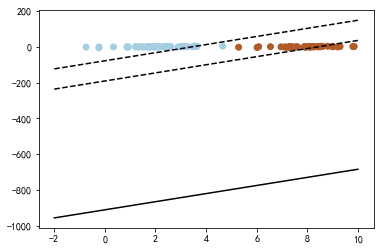

In [26]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter(X[:, 0].flat, X[:, 1].flat, c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

# c=1时

In [27]:
# 获取分割超平面
w = clf2.coef_[0]
# 斜率
a = -w[0] / w[1]
# 从-2到10，顺序间隔采样50个样本，默认是num=50
xx = np.linspace(-2, 10)  # , num=50)
# 二维的直线方程
yy = a * xx - (clf2.intercept_[0]) / w[1]
print("yy=", yy)

yy= [-20.04314604 -19.31185381 -18.58056159 -17.84926936 -17.11797714
 -16.38668492 -15.65539269 -14.92410047 -14.19280824 -13.46151602
 -12.7302238  -11.99893157 -11.26763935 -10.53634713  -9.8050549
  -9.07376268  -8.34247045  -7.61117823  -6.87988601  -6.14859378
  -5.41730156  -4.68600933  -3.95471711  -3.22342489  -2.49213266
  -1.76084044  -1.02954821  -0.29825599   0.43303623   1.16432846
   1.89562068   2.6269129    3.35820513   4.08949735   4.82078958
   5.5520818    6.28337402   7.01466625   7.74595847   8.4772507
   9.20854292   9.93983514  10.67112737  11.40241959  12.13371182
  12.86500404  13.59629626  14.32758849  15.05888071  15.79017294]


In [28]:
print("support_vectors_=", clf2.support_vectors_)
b = clf2.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf2.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

support_vectors_= [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]


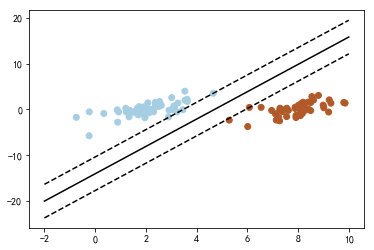

In [29]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter(X[:, 0].flat, X[:, 1].flat, c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

# C=10时

In [30]:
# 获取分割超平面
w = clf3.coef_[0]
# 斜率
a = -w[0] / w[1]
# 从-2到10，顺序间隔采样50个样本，默认是num=50
xx = np.linspace(-2, 10)  # , num=50)
# 二维的直线方程
yy = a * xx - (clf3.intercept_[0]) / w[1]
print("yy=", yy)

yy= [-20.04314604 -19.31185381 -18.58056159 -17.84926936 -17.11797714
 -16.38668492 -15.65539269 -14.92410047 -14.19280824 -13.46151602
 -12.7302238  -11.99893157 -11.26763935 -10.53634713  -9.8050549
  -9.07376268  -8.34247045  -7.61117823  -6.87988601  -6.14859378
  -5.41730156  -4.68600933  -3.95471711  -3.22342489  -2.49213266
  -1.76084044  -1.02954821  -0.29825599   0.43303623   1.16432846
   1.89562068   2.6269129    3.35820513   4.08949735   4.82078958
   5.5520818    6.28337402   7.01466625   7.74595847   8.4772507
   9.20854292   9.93983514  10.67112737  11.40241959  12.13371182
  12.86500404  13.59629626  14.32758849  15.05888071  15.79017294]


In [31]:
print("support_vectors_=", clf3.support_vectors_)
b = clf3.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf3.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

support_vectors_= [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]


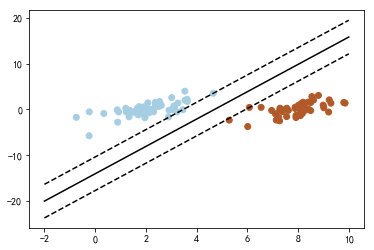

In [32]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter(X[:, 0].flat, X[:, 1].flat, c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()